In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('flip_data_cleaned.csv')
data.head()

,Unnamed: 0,brand,model,ram,storage,display size,display type,rear camera,front camera,price
0,0,realme,c53,6,64,6.74,HD,108,8,10999
1,2,vivo,t2x 5g,8,128,6.58,Full HD,50,8,15999
2,3,vivo,t2x 5g,6,128,6.58,Full HD,50,8,13999
3,7,vivo,t2x 5g,4,128,6.58,Full HD,50,8,12999
4,10,realme,11x 5g,6,128,6.72,Full HD,64,8,14999


In [3]:
data.drop(['Unnamed: 0', 'model'],axis=1, inplace=True)
data.head()

,brand,ram,storage,display size,display type,rear camera,front camera,price
0,realme,6,64,6.74,HD,108,8,10999
1,vivo,8,128,6.58,Full HD,50,8,15999
2,vivo,6,128,6.58,Full HD,50,8,13999
3,vivo,4,128,6.58,Full HD,50,8,12999
4,realme,6,128,6.72,Full HD,64,8,14999


In [4]:
data.shape

(598, 8)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
data['brand'] = le.fit_transform(data['brand'])
data['display type'] = le.fit_transform(data['display type'])

In [7]:
data.head()

,brand,ram,storage,display size,display type,rear camera,front camera,price
0,8,6,64,6.74,2,108,8,10999
1,11,8,128,6.58,1,50,8,15999
2,11,6,128,6.58,1,50,8,13999
3,11,4,128,6.58,1,50,8,12999
4,8,6,128,6.72,1,64,8,14999


In [8]:
y = data['price']
x = data.drop(['price'], axis=1)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [10]:
X_train, x_test, Y_train, y_test = train_test_split(x,y, test_size=0.16)

In [11]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
res = model.predict(x_test)
print(res[:5])

[17749.  18990.  21999.  21888.  28144.5]


In [12]:
print(r2_score(y_test, res))

0.7053058260999141


In [13]:
len(y_test)

96

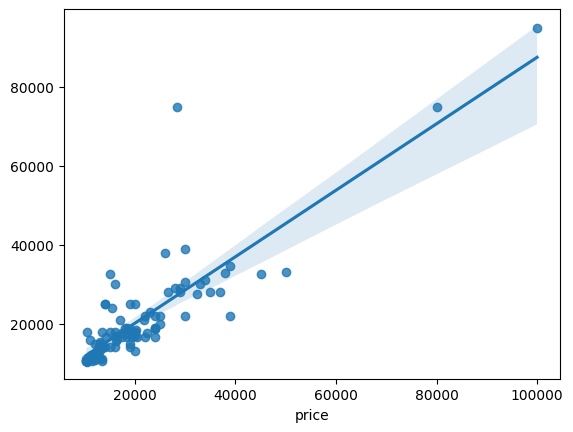

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.regplot(x=y_test, y=res)
plt.show()

In [15]:
import xgboost as xgb


In [16]:
model2 = xgb.XGBRegressor()
model2.fit(X_train, Y_train)
res2 = model2.predict(x_test)
print(res2[:5])

[25427.746 22149.824 26584.473 17229.578 27932.86 ]


In [17]:
print(r2_score(y_test, res2))

0.7311411755991899


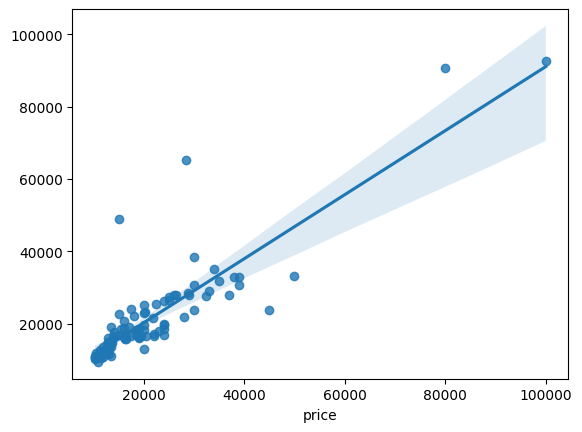

In [18]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
sns.regplot(x=y_test, y=res2)
plt.show()

We will try to compare different models and pick the best model using cross validation

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [20]:
params = {
    'SVR' : {'model':SVC(), 'params':{'C':[3,5,7]}},
    'XGBRegressor' : {'model': xgb.XGBRegressor(), 'params':{'n_estimators': [10, 20, 30, 50, 100, 1000], 'max_depth':[3, 5, 7]}},
    'DecisionTreeRegressor': {'model':DecisionTreeRegressor(), 'params':{'max_depth': [2, 5, 10]}}
}

In [21]:
gcv = []
for i in params:
  res = GridSearchCV(params[i]['model'], params[i]['params'], scoring='r2').fit(X_train, Y_train)
  gcv.append({'model':i, 'best params':res.best_params_, 'best score':res.best_score_})

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [23]:
gcv_df = pd.DataFrame(gcv)
gcv_df

,model,best params,best score
0,SVR,{'C': 5},0.262987
1,XGBRegressor,"{'max_depth': 5, 'n_estimators': 50}",0.781458
2,DecisionTreeRegressor,{'max_depth': 10},0.605730


As per the generated results, XGBRegressor is the best model that fits the data well.

In [24]:
final_model = xgb.XGBRegressor(n_estimators=100, max_depth=3)
final_model.fit(X_train, Y_train)
final_res = final_model.predict(x_test)
print(final_res[:5])

[20205.54  21901.895 21570.8   16700.715 26853.68 ]


In [25]:
print(r2_score(y_test, final_res))

0.8537238649304126


In [26]:
import os

# Replace with your desired directory path
save_dir = '/Users/rohitsatpute/Documents/Final Projects/flipkart_mobile_price_prediction/'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)


In [27]:
import pickle

In [28]:
import pickle

with open('/Users/rohitsatpute/Documents/Final Projects/flipkart_mobile_price_prediction/flip_model.pkl', 'wb') as files:
    pickle.dump(final_model, files)
